## We will construct a linear model that can predict a car's mileage (mpg) by using its other attributes.

### Data Description:

The dataset has 9 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

1. mpg: miles per gallon
2. cylinders: number of cylinders
3. displacement: engine displacement in cubic inches
4. horsepower: horsepower of the car
5. weight: weight of the car in pounds
6. acceleration: time taken, in seconds, to accelerate from O to 60 mph
7. model year: year of manufacture of the car (modulo 100)
8. origin: region of origin of the car (1 - American, 2 - European, 3 - Asian)
9. car name: name of the car

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load and explore the data

Loding data into Google Colab. (If running it locally on jupyter this is not necessary - just use 'cData = pd.read_csv("auto-mpg.csv")')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import files
#import io

#try:
 #   uploaded
#except NameError:
  #  uploaded = files.upload()

#cData = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
cData = pd.read_csv("/content/drive/MyDrive/Python Course/Supervised Learning _ Foundations/Week 2 _ Linear Regression Assumptions and Statistical Inference/auto-mpg.csv")

In [ ]:
# let's check the shape of the data
cData.shape

(398, 9)

In [ ]:
# let's check the first 5 rows of the data
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# let's check column types and number of values
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


* Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
* The horsepower and car name columns are string columns ('object' type).


We will be dropping the 'car name' column for prediction purposes.

In [ ]:
cData = cData.drop(["car name"], axis=1)

## Dealing with Missing Values

In [ ]:
# let's check the statistical summary of the data
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


* The horsepower column is missing from the summary as it is not recognized as a numerical column.
* We will use the isdigit() function to check the values in the horsepower column that are not being recognized as numbers.

In [ ]:
hpIsDigit = pd.DataFrame(
    cData.horsepower.str.isdigit()
)  # if the string is made of digits store True else False

# print the entries where isdigit = False
cData[hpIsDigit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


* We know that '?' denotes missing values.
* We will replace them with NaN. (this will help us deal with the missing values elegantly)

In [ ]:
cData = cData.replace("?", np.nan)
cData[hpIsDigit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


* There are various ways to handle missing values.
* We can drop the rows, replace missing values with the mean/median of the available values, etc.
* Instead of dropping the rows, we will be replacing the missing values with median values.

In [ ]:
# checking column medians
cData.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [ ]:
# Let's replace the missing values with median values of the columns.
# Note that we do not need to specify the column names below.
# Every column's missing value is replaced with that column's median respectively

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller, axis=0)

In [ ]:
# let's convert the horsepower column from object type to float type
cData["horsepower"] = cData["horsepower"].astype(float)

**Let's replace the origin column values with their actual values.**

In [ ]:
cData["origin"] = cData["origin"].replace({1: "america", 2: "europe", 3: "asia"})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


## Bivariate Analysis

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

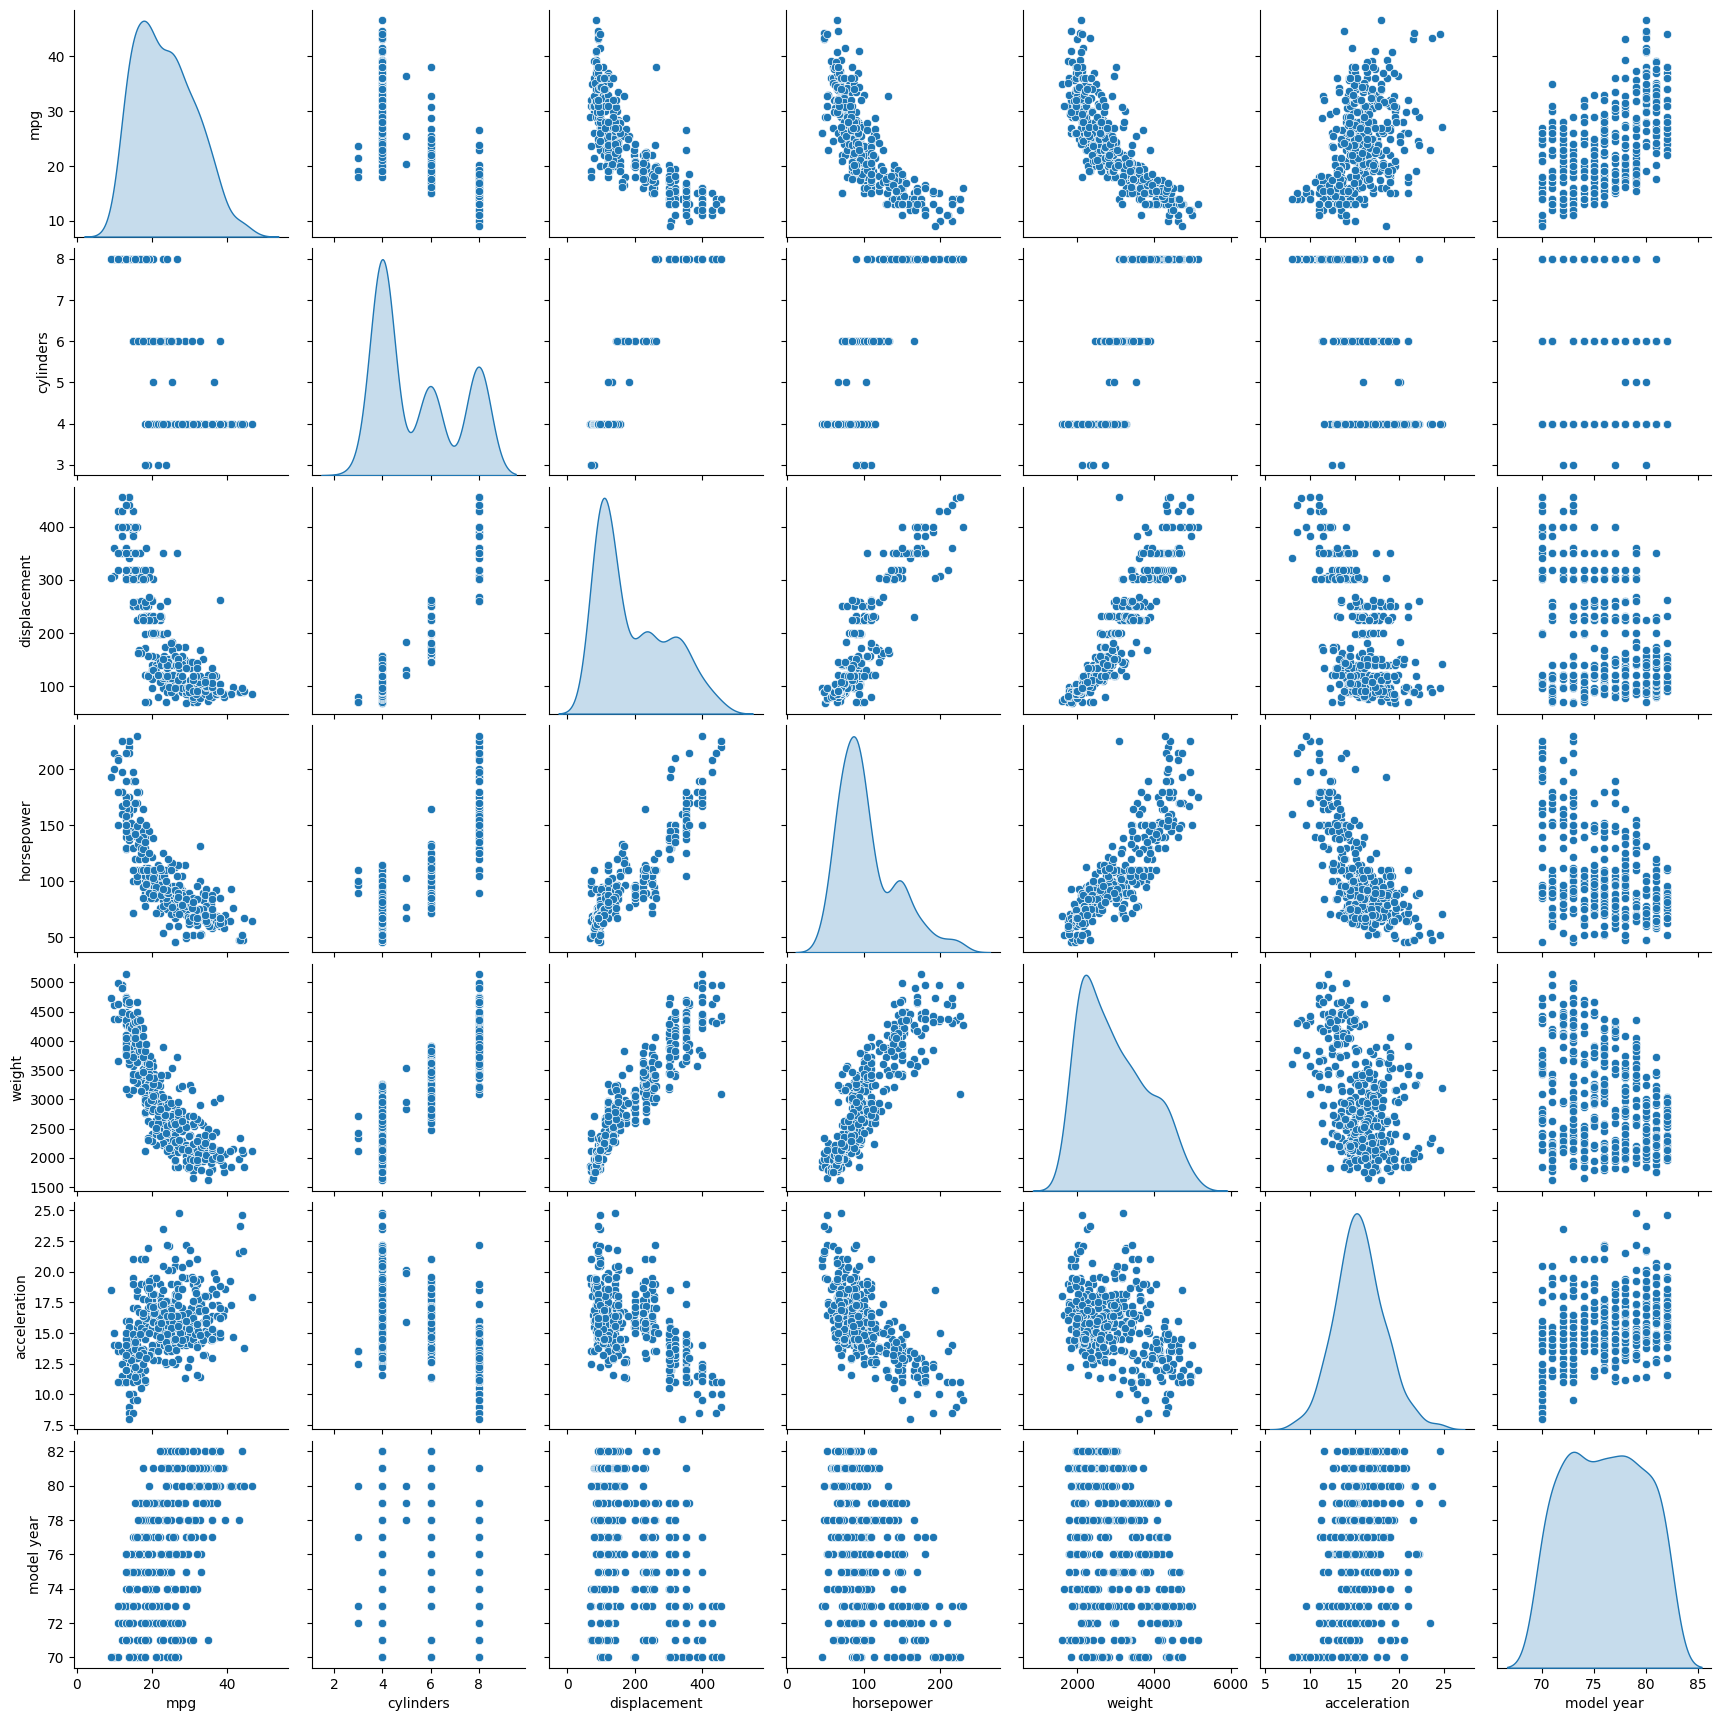

In [ ]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(
    cData_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

* Observe that the relationship between 'mpg' and other attributes is not really linear.
* However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern.
* Several assumptions of classical linear regression seem to be violated

## Create Dummy Variables

Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that European cars fall exactly half way between American and Asian cars! We don't want to impose such a baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car American?", "Is this car European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.

We will also be dropping one of those three columns to ensure there is no linear dependency between the three columns.

In [ ]:
# drop_first=True will drop one of the three origin columns
cData = pd.get_dummies(cData, columns=["origin"], drop_first=True)
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


## Split Data

In [ ]:
# independent variables
X = cData.drop(["mpg"], axis=1)
# dependent variable
y = cData[["mpg"]]

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

**We will now split X and y into train and test sets in a 70:30 ratio.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print(X_train.head())

     const  cylinders  displacement  horsepower  weight  acceleration  \
350    1.0          4         105.0        63.0    2215          14.9   
59     1.0          4          97.0        54.0    2254          23.5   
120    1.0          4         121.0       112.0    2868          15.5   
12     1.0          8         400.0       150.0    3761           9.5   
349    1.0          4          91.0        68.0    1985          16.0   

     model year  origin_asia  origin_europe  
350          81            0              0  
59           72            0              1  
120          73            0              1  
12           70            0              0  
349          81            1              0  


In [ ]:
print(X_test.head())

     const  cylinders  displacement  horsepower  weight  acceleration  \
174    1.0          6         171.0        97.0    2984          14.5   
359    1.0          4         141.0        80.0    3230          20.4   
250    1.0          8         318.0       140.0    3735          13.2   
274    1.0          5         131.0       103.0    2830          15.9   
283    1.0          6         232.0        90.0    3265          18.2   

     model year  origin_asia  origin_europe  
174          75            0              0  
359          81            0              1  
250          78            0              0  
274          78            0              1  
283          79            0              0  


## Fit Linear Model

In [ ]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [ ]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.20e-93
Time:                        18:52:00   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.2847      5.679     -3.748

### Interpretation of R-squared

* The R-squared value tells us that our model can explain 81.4% of the variance in the training set.

### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* In this data ser, for example, an increase of 1 cylinder occurs with a 0.3948 decrease in mpg, and a unit increase in displacement occurse with a 0.0289 increase in the mpg.

* Earlier we saw that the relationship of mpg with displacement, horsepower and weight is almost the same (as mpg increases, the variable decreases and vice versa). This suggests that all the 3 factors have similar effect on mpg, i.e., the increase in either of the 3 decreases mpg. Therefore, the signs of the coefficents should be the same. But we observe that it is not so. This indicates the presence of multicollinearity in our data.

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

### How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const            752.897742
cylinders         11.692490
displacement      24.771073
horsepower         8.798447
weight            11.820934
acceleration       2.507584
model year         1.287721
origin_asia        1.732001
origin_europe      1.654078
dtype: float64



* The VIF values indicate that the features cylinders, displacement, horsepower, and weight are correlated with one or more independent features.

* Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of acceleration, model year and origin variables.

* To treat multicollinearity, we will have to drop one or more of the correlated features (cyclinders, displacement, horsepower and weight).

* We will drop the variable that has the least impact on the adjusted R-squared of the model.

#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [ ]:
X_train2 = X_train.drop(["displacement"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.808 
Adjusted R-squared: 0.803


* On dropping 'displacement', adj. R-squared decresed by 0.006

In [ ]:
X_train3 = X_train.drop(["weight"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.761 
Adjusted R-squared: 0.755


* On dropping 'weight', adj. R-squared decreased by 0.054
* This sharp decline indicates that 'weight' is an important predictor and shouldn't be removed.

In [ ]:
X_train4 = X_train.drop(["cylinders"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.814 
Adjusted R-squared: 0.809


* On dropping 'cylinder', adj. R-squared almost remains the same.


In [ ]:
X_train5 = X_train.drop(["horsepower"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.813 
Adjusted R-squared: 0.808


* On dropping 'horsepower', adj. R-squared decresed by 0.001


**Since there is no effect on adj. R-squared after dropping the 'cylinders' column, we can remove it from the training set.**

In [ ]:
X_train = X_train.drop(["cylinders"], axis=1)

In [ ]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     168.2
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.37e-94
Time:                        19:30:27   Log-Likelihood:                -734.66
No. Observations:                 278   AIC:                             1485.
Df Residuals:                     270   BIC:                             1514.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -22.1879      5.594     -3.966

### Let's check if multicollinearity is still present in the data.

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const            731.003943
displacement      13.248599
horsepower         8.796783
weight            11.820508
acceleration       2.501131
model year         1.286863
origin_asia        1.696541
origin_europe      1.645867
dtype: float64



* We know that weight is an important predictor, so let's see the effect of dropping displacement and horsepower now.

In [ ]:
X_train6 = X_train.drop(["displacement"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.807 
Adjusted R-squared: 0.803


* On dropping 'displacement', adj. R-squared decresed by 0.006

In [ ]:
X_train7 = X_train.drop(["horsepower"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.812 
Adjusted R-squared: 0.808


* On dropping 'horsepower', adj. R-squared decresed by 0.001

**Since there is a very small effect (0.001) on adj. R-squared after dropping the 'horsepower' column, we can remove it from the training set.**

In [ ]:
X_train = X_train.drop(["horsepower"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.4
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           2.30e-95
Time:                        19:36:51   Log-Likelihood:                -735.58
No. Observations:                 278   AIC:                             1485.
Df Residuals:                     271   BIC:                             1511.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -25.0108      5.192     -4.817

### Let's check if multicollinearity is still present in the data.

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const            627.855162
displacement      12.752086
weight             9.168726
acceleration       1.608205
model year         1.251558
origin_asia        1.632818
origin_europe      1.618991
dtype: float64



**Multicollinearity is still present in our data, and hence, we should drop the 'displacement' column as well.**

In [ ]:
X_train = X_train.drop(["displacement"], axis=1)

### Let's check if multicollinearity is still present in the data.

In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const            578.336128
weight             1.875617
acceleration       1.270708
model year         1.163827
origin_asia        1.485056
origin_europe      1.371190
dtype: float64



VIF for all the features is <2

### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [ ]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     227.0
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           7.71e-95
Time:                        19:39:19   Log-Likelihood:                -739.67
No. Observations:                 278   AIC:                             1491.
Df Residuals:                     272   BIC:                             1513.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.8630      5.048     -4.133

**As observed in the above model (olsres_9), 'acceleration' has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'mpg'.**

In [ ]:
X_train8 = X_train.drop(["acceleration"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train8)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     284.6
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           4.52e-96
Time:                        19:40:43   Log-Likelihood:                -739.73
No. Observations:                 278   AIC:                             1489.
Df Residuals:                     273   BIC:                             1508.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -20.5889      4.968     -4.144

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.809 to 0.804). This shows that these variables did not have much predictive power.**

## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_10.resid.values  # residuals

df_pred.head()



,Actual Values,Fitted Values,Residuals
0,34.7,31.561419,3.138581
1,23.0,26.114223,-3.114223
2,19.0,23.217684,-4.217684
3,15.0,13.334099,1.665901
4,34.1,34.484220,-0.384220


### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

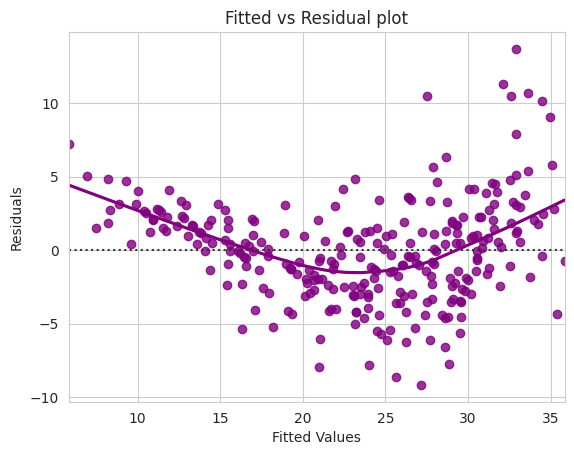

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We can observe a pattern in the residual vs fitted values, hence we will try to transform the continous variables in the data.

In [ ]:
# columns in training set
X_train8.columns

Index(['const', 'weight', 'model year', 'origin_asia', 'origin_europe'], dtype='object')

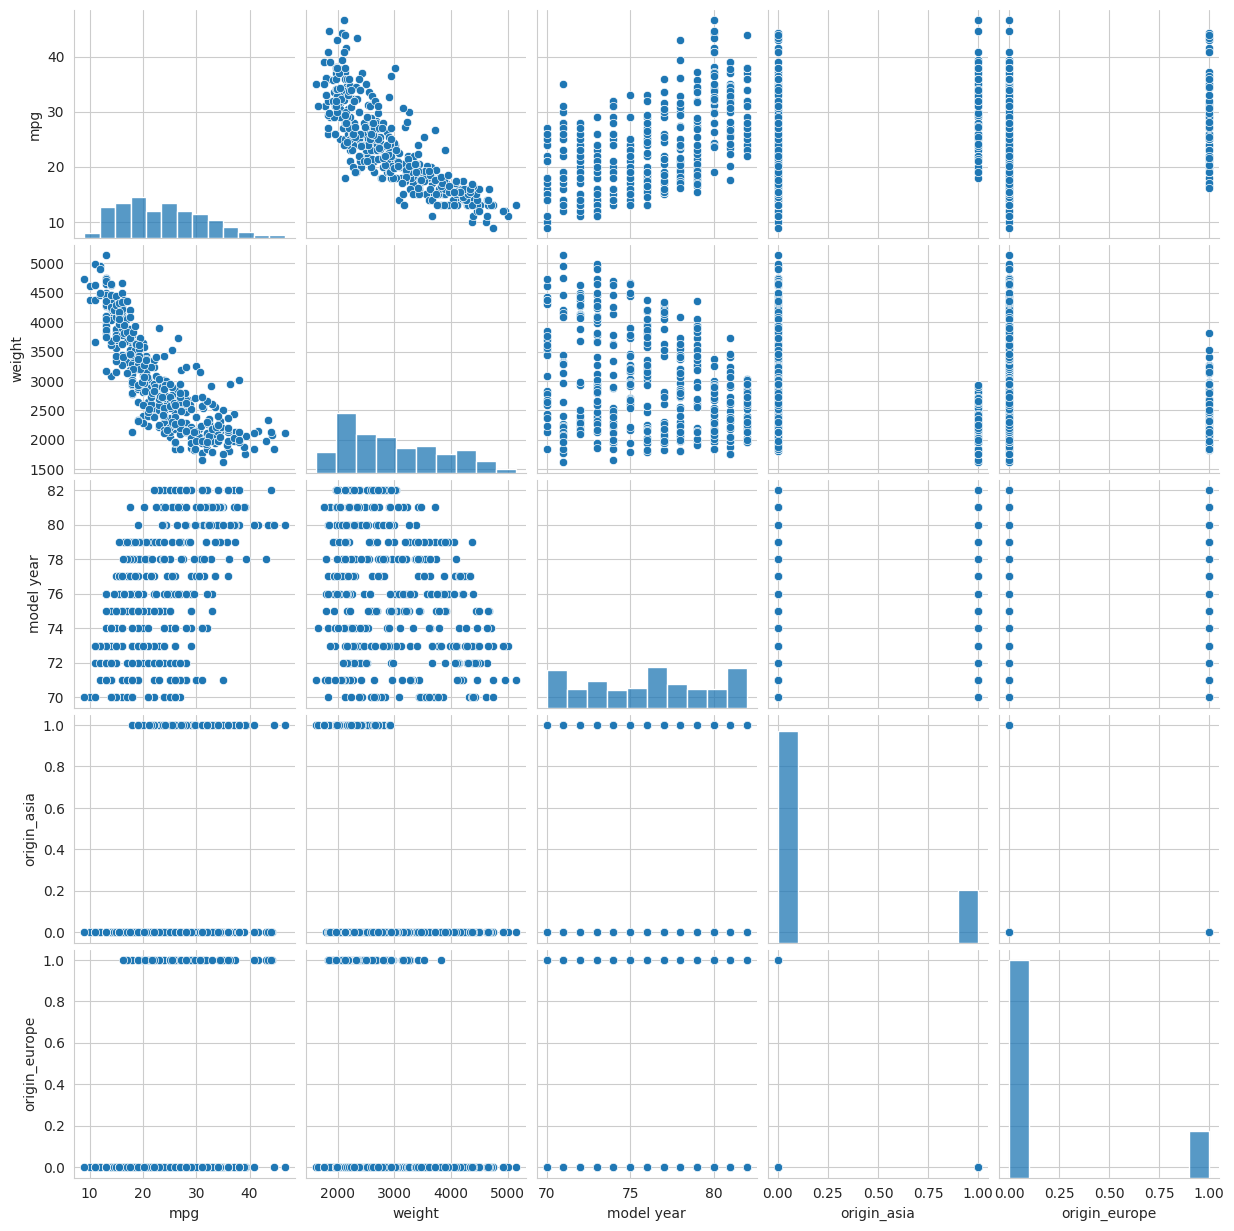

In [ ]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(cData[["mpg", "weight", "model year", "origin_asia", "origin_europe"]])
plt.show()

**We see that the 'weight' column has a slight nonlinear relationship with 'mpg'. We can transform the 'weight' column.**

In [ ]:
# using square transformation
X_train8["weight_sq"] = np.square(X_train8["weight"])

# let's create a model with the transformed data
olsmod_11 = sm.OLS(y_train, X_train8)
olsres_11 = olsmod_11.fit()
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     312.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.89e-110
Time:                        19:49:20   Log-Likelihood:                -702.85
No. Observations:                 278   AIC:                             1418.
Df Residuals:                     272   BIC:                             1439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2450      4.803     -0.467

* We observe that the adj. R-squared has increased. Let's check the residual plot again.



In [ ]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_11.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_11.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,34.7,33.025269,1.674731
1,23.0,25.901375,-2.901375
2,19.0,21.003846,-2.003846
3,15.0,11.931984,3.068016
4,34.1,35.904840,-1.804840


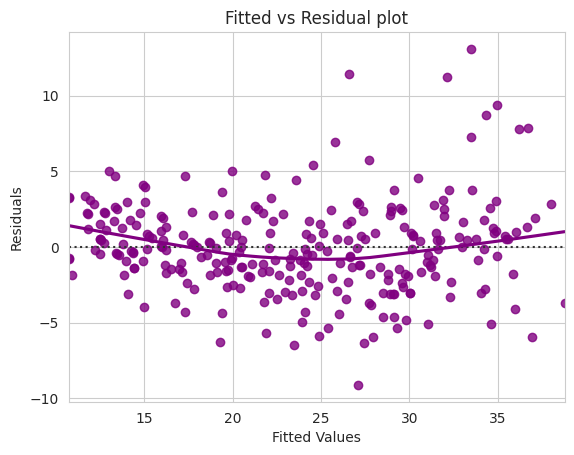

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We observe that the pattern has slightly decreased and the data points seems to be randomly distributed.


### TEST FOR NORMALITY

**What is the test?**

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check the Normality?**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

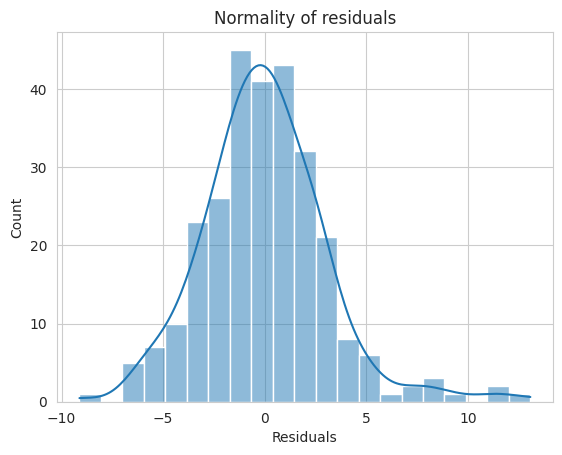

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

* The residual terms are normally distributed.

**The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

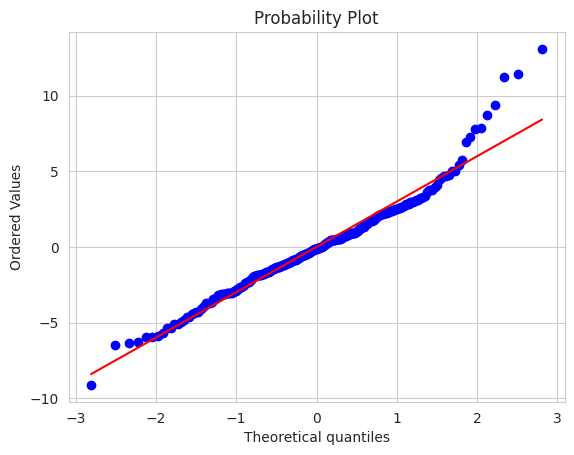

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9622615575790405, pvalue=1.1951609621974058e-06)

* Since p-value < 0.05, the residuals are not normal as per shapiro test.
* Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

The null and alternate hypotheses of the goldfeldquandt test are as follows:

* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train8)
lzip(name, test)

[('F statistic', 0.8728487945403869), ('p-value', 0.7830103059970792)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_11).

In [ ]:
print(olsres_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     312.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.89e-110
Time:                        20:12:10   Log-Likelihood:                -702.85
No. Observations:                 278   AIC:                             1418.
Df Residuals:                     272   BIC:                             1439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2450      4.803     -0.467

### Observations

* R-squared of the model is 0.852 and adjusted R-squared is 0.849, which shows that the model is able to explain ~85% variance in the data. This is quite good.

* A unit increase in the model year will result in a 0.8902 unit increase in the car's mileage, all other variables remaining constant.

* The mpg of a car of Asian origin will be 0.1859 units higher than a car of American origin, all other variables remaining constant.

* The mpg of a car of European origin will be 1.3189 units higher than a car of American origin, all other variables remaining constant.

## Predictions

### Let's print the linear regression equation.

In [ ]:
# let's check the model parameters
olsres_11.params

const           -2.244962
weight          -0.022121
model year       0.890230
origin_asia      0.185926
origin_europe    1.318924
weight_sq        0.000002
dtype: float64

In [ ]:
# Let us write the equation of linear regression
Equation = "mpg ="
print(Equation, end=" ")
for i in range(len(X_train8.columns)):
    if i == 0:
        print(olsres_11.params[i], "+", end=" ")
    elif i != len(X_train8.columns) - 1:
        print(
            olsres_11.params[i],
            "* (",
            X_train8.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_11.params[i], "* (", X_train8.columns[i], ")")

mpg = -2.2449619333034163 + -0.022121230258624815 * ( weight ) +  0.8902301552066174 * ( model year ) +  0.18592647767199716 * ( origin_asia ) +  1.3189237652394645 * ( origin_europe ) +  2.4785070327756164e-06 * ( weight_sq )


### We can now use the model for making predictions on the test data.

In [ ]:
X_train8.columns

Index(['const', 'weight', 'model year', 'origin_asia', 'origin_europe',
       'weight_sq'],
      dtype='object')

In [ ]:
X_test.columns

Index(['const', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_asia', 'origin_europe'],
      dtype='object')

In [ ]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["cylinders", "displacement", "horsepower", "acceleration"], axis=1
)

In [ ]:
# transforming the weight column in the test data corresponding to the training set
X_test2["weight_sq"] = np.square(X_test2["weight"])

In [ ]:
# let's make predictions on the test set
y_pred = olsres_11.predict(X_test2)

In [ ]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

3.0322818974956713

In [ ]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

2.883835901773384

In [ ]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

2.2445898017606516

In [ ]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

2.203518687834685

* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 2.2 units on the test data.
* Hence, we can conclude the model "ols_res11" is good for prediction as well as inference purposes.